In [42]:
import rasterio as rio
from rasterio.features import dataset_features
import geopandas as gpd
from shapely.geometry.polygon import orient
from shapely.geometry import Polygon
from shapely.ops import unary_union
from rasterio.plot import show

def rio_to_exterior(fp, simplify = False):
    with rio.open(fp) as src:
        shapes = list(dataset_features(src, bidx=1, as_mask=False, geographic=True, band=False))
        result = gpd.GeoDataFrame.from_dict(shapes, geometry=shapes[0]['geometry']['coordinates'], crs = 'EPSG:4326')
        for i in result.index:
            result.iloc[i]['geometry'] = Polygon(result.iloc[i]['geometry']['coordinates'][0])
        boundary = gpd.GeoSeries(unary_union(result['geometry']))
        boundary_gdf = gpd.GeoDataFrame(boundary, columns = ['geometry'], crs = 'EPSG:4326')

    if simplify:
        boundary_gdf = orient(boundary_gdf.simplify(0.01, preserve_topology=False).loc[0],sign=1.0)
    return boundary_gdf

In [44]:
test_boundary = rio_to_exterior('/home/jovyan/isce_sat2/contributors/sam/download/fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff')




TypeError: Input must be valid geometry objects: [(-106.12287804, 40.16465736), (-106.12287804, 39.65006064), (-105.45032424, 39.65006064), (-105.45032424, 40.16465736), (-106.12287804, 40.16465736)]

In [43]:
fp = '/home/jovyan/isce_sat2/contributors/sam/download/fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff'
file = rio.open(fp)
shapes = list(dataset_features(file, bidx=1, as_mask=False, geographic=True, band=False))



In [77]:
import numpy as np
from rasterio import features
fn = fp
feat_list = []
#ovr_scale = 8
dt_fieldnum = 4
src = rio.open(fn)
a = src.read(1, masked=True)
mask = np.ma.getmaskarray(a).astype(np.uint8) - 1
shapes = features.shapes(mask, mask=mask, transform=src.transform)
geom_list = list(shapes)
feat_list.extend([{'properties':{'fn':fn}, 'geometry':i[0]} for i in geom_list])

gdf = gpd.GeoDataFrame.from_features(feat_list, crs=src.crs)

TypeError: 'DatasetReader' object is not subscriptable

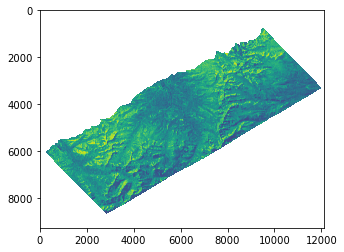

<AxesSubplot:>

In [79]:
show(a)

<closed DatasetReader name='/home/jovyan/isce_sat2/contributors/sam/download/fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff' mode='r'>

In [13]:
gdf.head()

,geometry,fn
0,"POLYGON ((-106.12288 40.16466, -106.12288 39.6...",/home/jovyan/isce_sat2/contributors/sam/downlo...


<AxesSubplot:>

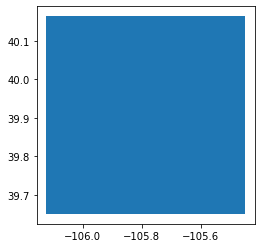

In [14]:
gdf.plot()

In [18]:
with open('extents_test.geojson' , 'w') as file:
    file.write(gdf.to_json())

In [2]:
import rioxarray as rxa
fp = '/home/jovyan/isce_sat2/contributors/sam/download/fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff'
bounds = rxa.open_rasterio(fp).rio.bounds()

In [72]:
type(bounds)

tuple

In [76]:
bounds

(-106.12287804, 39.65006063999999, -105.45032424000001, 40.16465736)

In [23]:
import pandas as pd
df = pd.DataFrame(
    {'Latitude': [39.65006063999999, 39.65006063999999, 40.16465736, 40.16465736],
     'Longitude': [-106.12287804, -105.45032424000001, -106.12287804, -105.45032424000001]})

<AxesSubplot:>

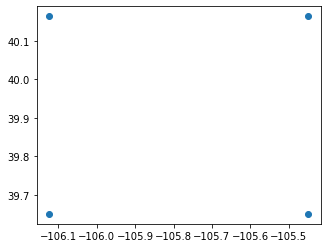

In [28]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

gdf.plot()

In [20]:
gdf.head()

,geometry,fn
0,"POLYGON ((-106.12288 40.16466, -106.12288 39.6...",/home/jovyan/isce_sat2/contributors/sam/downlo...


In [77]:
test_boundary = rio_to_exterior('/home/jovyan/isce_sat2/contributors/sam/download/fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff')

In [30]:
fp = '/home/jovyan/isce_sat2/contributors/sam/download/fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff'


with rio.open(fp) as src:
        shapes = list(dataset_features(src, bidx=1, as_mask=False, geographic=True, band=False))
        print(shapes)
        
        result = gpd.GeoDataFrame.from_dict(shapes, crs = 'EPSG:4326')
        for i in result.index:
            result.iloc[i]['geometry'] = Polygon(result.iloc[i]['geometry']['coordinates'][0])
        boundary = gpd.GeoSeries(unary_union(result['geometry']))
        boundary_gdf = gpd.GeoDataFrame(boundary, columns = ['geometry'], crs = 'EPSG:4326')


[{'type': 'Feature', 'id': 'fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff:0', 'properties': {'val': 255.0, 'filename': 'fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff'}, 'bbox': [-106.12287804, 39.65006064, -105.45032424, 40.16465736], 'geometry': {'type': 'Polygon', 'coordinates': [[(-106.12287804, 40.16465736), (-106.12287804, 39.65006064), (-105.45032424, 39.65006064), (-105.45032424, 40.16465736), (-106.12287804, 40.16465736)]]}}]


ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

In [ ]:
with rio.open(fp) as src:
    shapes = list(dataset_features(src, bidx=1, as_mask=False, geographic=True, band=False))

In [ ]:
shapes = shapes[0].split(',')
shapes

In [ ]:
type(shapes[0])

In [ ]:
dict = shapes[0]

In [31]:
dict.keys()

TypeError: unbound method dict.keys() needs an argument

In [32]:

dict['geometry']

dict['geometry']

In [33]:
shapes[0]['geometry']

{'type': 'Polygon',
 'coordinates': [[(-106.12287804, 40.16465736),
   (-106.12287804, 39.65006064),
   (-105.45032424, 39.65006064),
   (-105.45032424, 40.16465736),
   (-106.12287804, 40.16465736)]]}

In [53]:
geom = shapes[0]['geometry']['coordinates'][0]

In [63]:
type(geom)

tuple

In [62]:
geom[0][0]

-106.12287804

In [70]:
df = pd.DataFrame(geom, columns =['lon', 'lat'])
df



,lon,lat
0,-106.122878,40.164657
1,-106.122878,39.650061
2,-105.450324,39.650061
3,-105.450324,40.164657
4,-106.122878,40.164657


In [71]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))

gdf

,lon,lat,geometry
0,-106.122878,40.164657,POINT (-106.12288 40.16466)
1,-106.122878,39.650061,POINT (-106.12288 39.65006)
2,-105.450324,39.650061,POINT (-105.45032 39.65006)
3,-105.450324,40.164657,POINT (-105.45032 40.16466)
4,-106.122878,40.164657,POINT (-106.12288 40.16466)


<AxesSubplot:>

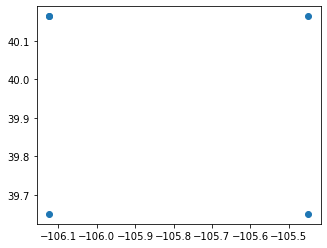

In [73]:
gdf.plot()

In [57]:
geom[0]


(-106.12287804, 40.16465736)

In [47]:
df = pd.DataFrame(geom)
df

,0,1,2,3,4
0,"(-106.12287804, 40.16465736)","(-106.12287804, 39.65006064)","(-105.45032424, 39.65006064)","(-105.45032424, 40.16465736)","(-106.12287804, 40.16465736)"


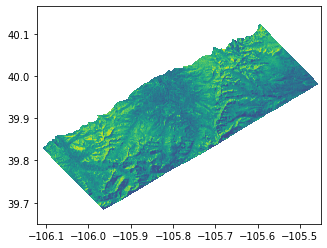

In [34]:
with rio.open('/home/jovyan/isce_sat2/contributors/sam/download/fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff') as f:
    show(f)